RNN은 입력과 출력을 시퀀스 단위로 출력하는 Sequence Model<br>
번역기에서의 입력은 번역하고자 하는 문장. 즉, <b>단어 시퀀스</b><br>
출력은 번역한 문장, <b>단어 시퀀스</b><br><br>
이러한 시퀀스들을 처리하기 위해 고안된 모델들을 <big><b>시퀀스 모델</b></big>이라고 함<br>
<big><b>RNN</b></big>은 <u>딥러닝에서도 가장 기본적인 시퀀스 모델</u><br><br>
순환 신경망과 재귀 신경망(Recursive Neural Network)는 다른 개념

# 

# *순환 신경망(Recurrent Neural Network, RNN)*

<b>피드 포워드 신경망(Feed Forward Neural Network)</b> : 은닉층에서 활성화 함수를 지나 오직 출력층 방향으로만 향하는 신경망<br><br>
### RNN
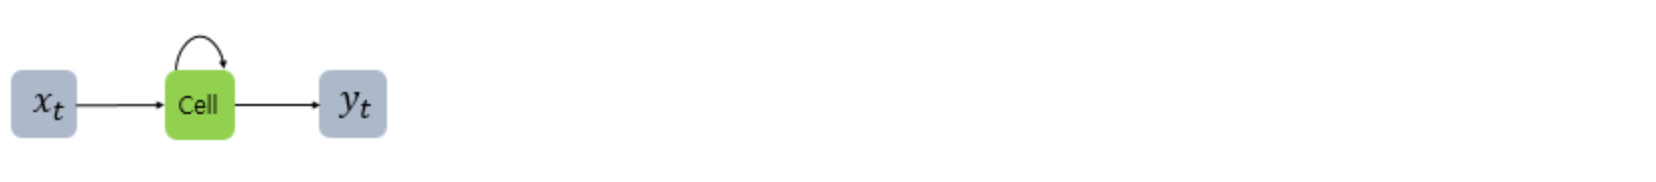
은닉층의 노드에서 활성화 함수를 통해 나온 결과를 출력층 방향으로도 보내면서, 다시 은닉층 노드의 다음 계산의 입력으로 보내는 특징이 있음<br>
<b>x</b> : 입력층의 입력 벡터<br>
<b>y</b> : 출력층 출력 벡터<br>
<b>cell</b> : 은닉층에서 활성화 함수를 통해 결과를 내보내는 역할을 하는 노드<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;이전 값을 기억하려고 하는 메모리 역할을 수행하므로 <b>메모리 셀</b>, <b>RNN 셀</b>이라고도 표현<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;각각의 시점(time step)에서 바로 이전 시점에서의 은닉층 메모리 셀에서 나온 값을 자신의 입력으로 사용하는 재귀적 활동을 함<br>
<b>은닉 상태(hidden state)</b> : 메모리 셀이 출력층 방향으로 또는 다음 시점 t+1의 자신에게 보내는 값<br><br><br>

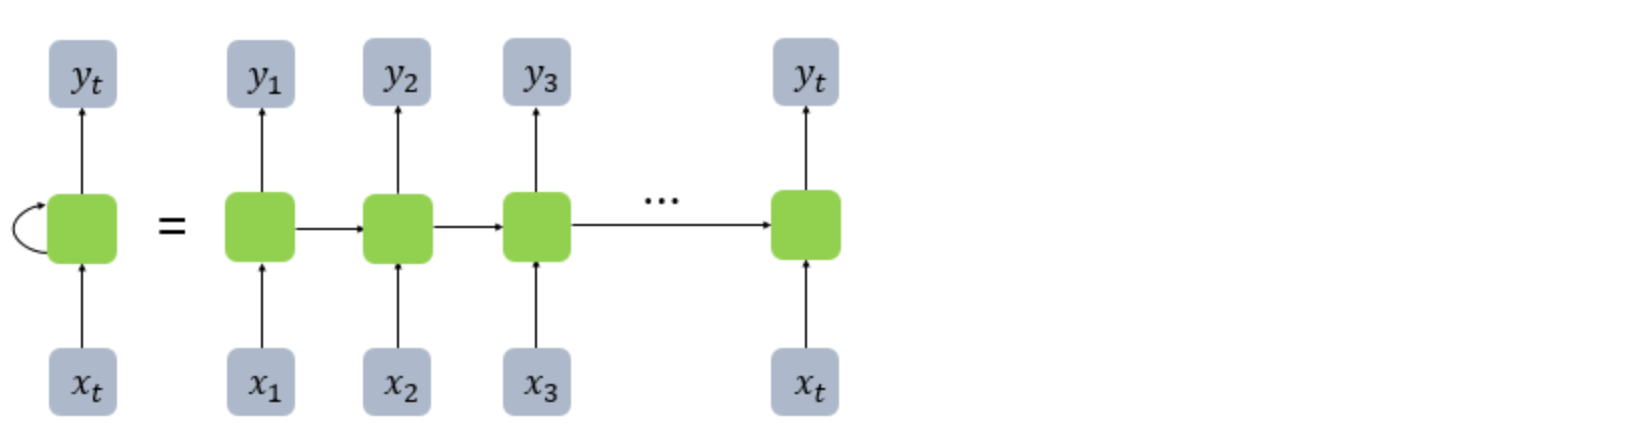
<br>RNN을 표현한 그림<br>
왼쪽 그림은 사이클을 그리는 화살표를 사용하여 표현, 오른쪽 그림은 시점의 흐름에 따라서 표현<br><br><br>

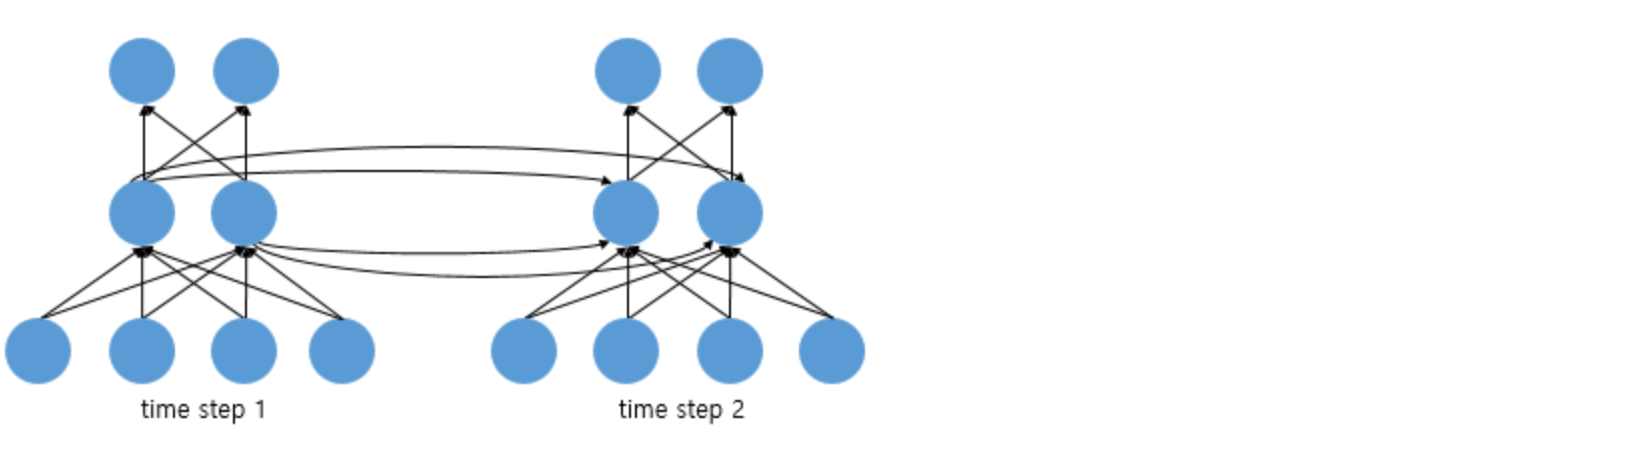
입력층 뉴런 수 : 4, 은닉층 뉴런 수 2, 출력층 뉴런 수 : 2<br><br><br>

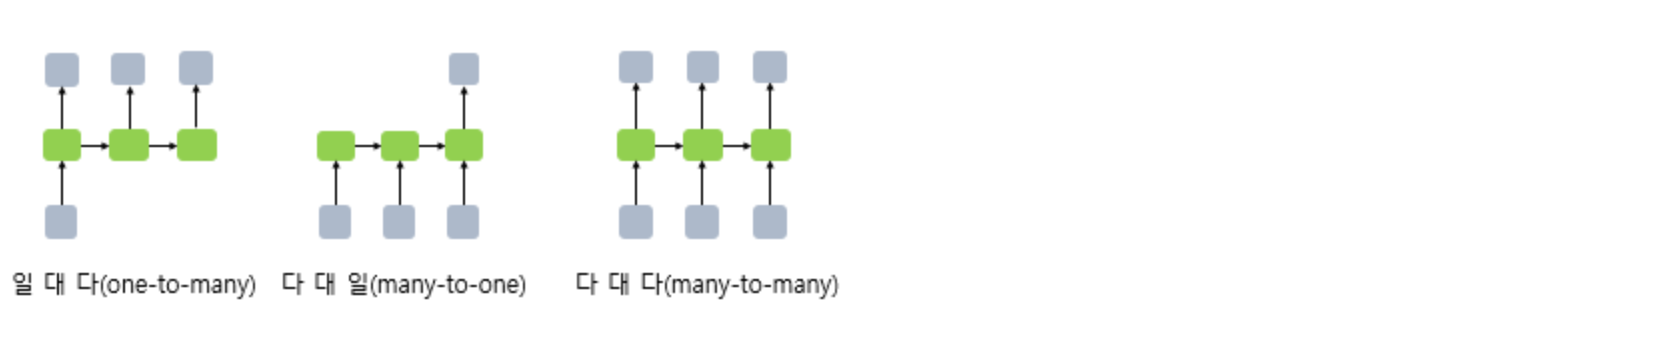
##### 일 대 다(one-to-many)
<blockquote>하나의 이미지 입력으로 사진의 제목을 출력하는 이미지 캡셔닝(Image Captioning)</blockquote>

##### 다 대 일(many-to-one)
<blockquote>단어 시퀀스로는 입력 문서를 긍정/부정으로 분류하는 감성 분류(sentiment classification), 메일을 정상/스팸으로 분류하는 스팸 분류(spam detection)</blockquote>

##### 다 대 다(many-to-many)
<blockquote>입력 문장으로 부터 대답 문장을 출력하는 챗봇<br>
입력 문장에서 번역된 문장을 출력하는 번역기<br>
개체명 인식이나 품사 태깅</blockquote><br>

# 

# *RNN 수식*

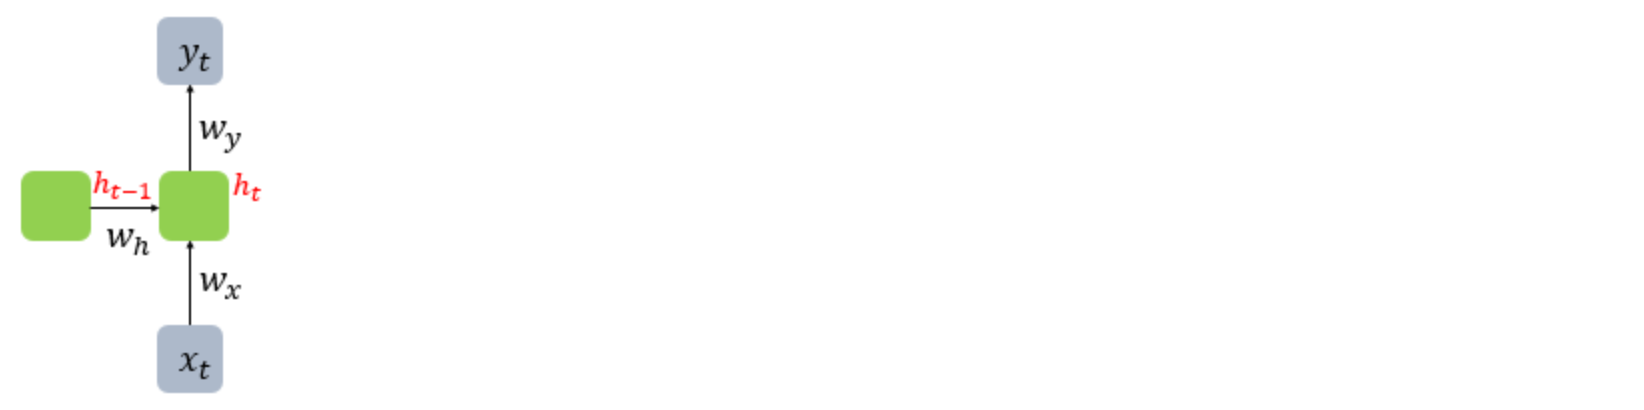
현재 시점 t에서의 은닉 상태값 ht이고, 은닉층의 메모리 셀은 ht를 계산하기 위해 총 두 개의 가중치를 갖는다.<br>
<u>입력층에서 입력을 위한 가중지 Wx</u>, <u>하나는 이전 시점 t-1의 은닉 상태값인 ht-1을 위한 가중치 Wh</u><br><br>
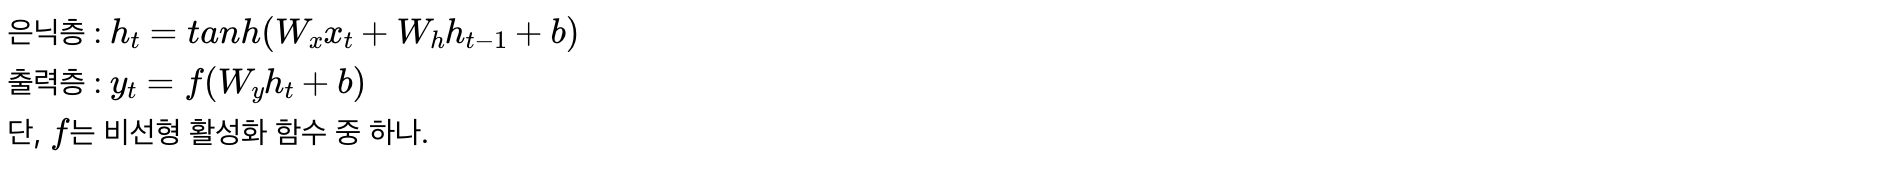
<br>

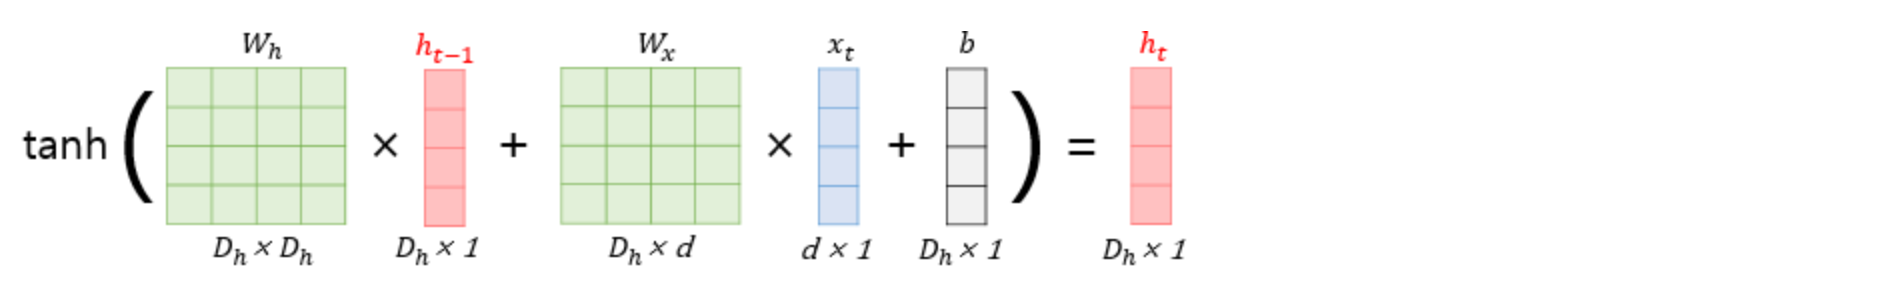
배치 크기 : 1, d : 4, Dh :4<br><br>
ht를 계산하기 위한 활성화 함수로 주로 하이퍼볼릭탄젠트 함수(tanh)가 사용되지만, ReLU로 바꿔 사용하는 시도도 있었다

# 

# *RNN 구현 - Numpy*

### *벡터 정의*

In [2]:
import numpy as np

In [3]:
timesteps = 10 # 시점의 수. NLP에서는 보통 문장의 길이가 된다.
input_size = 4 # 입력의 차원. NLP에서는 보통 단어 벡터의 차원이 된다.
hidden_size = 8 # 은닉 상태의 크기. 메모리 셀의 용량이다

In [4]:
inputs = np.random.random((timesteps, input_size)) # 입력에 해당되는 2D 텐서
print(inputs)

[[0.24891755 0.1474351  0.43706314 0.75274736]
 [0.20981663 0.05701014 0.94987915 0.42937264]
 [0.65317235 0.77175419 0.49115758 0.73212085]
 [0.69240185 0.53642848 0.85099644 0.95319435]
 [0.12678767 0.15358095 0.58877898 0.56167488]
 [0.38753975 0.76196404 0.23679422 0.19061521]
 [0.66747072 0.41152091 0.79435813 0.77550051]
 [0.27738631 0.37514662 0.22391243 0.84316357]
 [0.86750157 0.90108285 0.96961801 0.9391713 ]
 [0.91630624 0.13369461 0.1781311  0.48659922]]


In [5]:
hidden_state_t = np.zeros((hidden_size,)) # 초기 은닉 상태는 0(벡터)로 초기화
# 은닉 상태의 크기 hidden_size로 은닉 상태를 만듬.
print(hidden_state_t)

[0. 0. 0. 0. 0. 0. 0. 0.]


In [7]:
Wx = np.random.random((hidden_size, input_size))  # (8, 4)크기의 2D 텐서 생성. 입력에 대한 가중치.
Wh = np.random.random((hidden_size, hidden_size)) # (8, 8)크기의 2D 텐서 생성. 은닉 상태에 대한 가중치.
b = np.random.random((hidden_size,)) # (8,)크기의 1D 텐서 생성. 이 값은 편향(bias).

print(f"Wx : {Wx}")
print(f"Wh : {Wh}")
print(f"b : {b}")

Wx : [[0.67731458 0.88645049 0.09201383 0.53556675]
 [0.07565431 0.65417376 0.12438904 0.6793899 ]
 [0.38970448 0.01562375 0.42457248 0.56771742]
 [0.63037319 0.61421425 0.96278954 0.14999395]
 [0.19396907 0.9214452  0.00416104 0.59227965]
 [0.17303643 0.59523343 0.87547338 0.14700327]
 [0.40634057 0.71923036 0.21692944 0.80375028]
 [0.42385548 0.69142004 0.65543296 0.59455302]]
Wh : [[0.3261056  0.64653471 0.95585276 0.81046878 0.76213121 0.34683297
  0.90380935 0.95627224]
 [0.15739059 0.76915415 0.43359956 0.34253767 0.26155999 0.80631697
  0.94425999 0.66681914]
 [0.00713023 0.23323106 0.87381434 0.7945572  0.08394947 0.60388622
  0.50162876 0.83036407]
 [0.73135129 0.10132719 0.48723857 0.61469448 0.17628272 0.02228747
  0.03730994 0.4333925 ]
 [0.57113324 0.48318018 0.87794646 0.0964105  0.99090304 0.82303271
  0.7163729  0.22310022]
 [0.61982275 0.06422042 0.23305327 0.37956883 0.32852537 0.03297771
  0.72519697 0.62384603]
 [0.91054243 0.40242653 0.86569017 0.49365556 0.1577895

### *메모리 셀 동작*

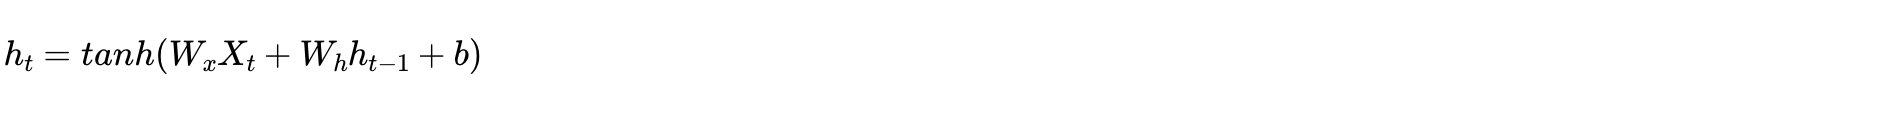
메모리 셀에서 은닉 상태를 계산하는 식

In [8]:
total_hidden_states = []

for input_t in inputs: # 각 시점에 따라서 입력값이 입력됨.
  output_t = np.tanh(np.dot(Wx,input_t) + np.dot(Wh,hidden_state_t) + b) # Wx * Xt + Wh * Ht-1 + b(bias)
  total_hidden_states.append(list(output_t)) # 각 시점의 은닉 상태의 값을 계속해서 축적
  print(np.shape(total_hidden_states)) # 각 시점 t별 메모리 셀의 출력의 크기는 (timestep, output_dim)
  hidden_state_t = output_t

total_hidden_states = np.stack(total_hidden_states, axis = 0) 
# 출력 시 값을 깔끔하게 해준다.

print(total_hidden_states) # (timesteps, output_dim)의 크기. 이 경우 (10, 8)의 크기를 가지는 메모리 셀의 2D 텐서를 출력.

(1, 8)
(2, 8)
(3, 8)
(4, 8)
(5, 8)
(6, 8)
(7, 8)
(8, 8)
(9, 8)
(10, 8)
[[0.84156678 0.83216058 0.90178179 0.93901312 0.78198489 0.8848101
  0.73108569 0.91917345]
 [0.99998412 0.99982902 0.99990229 0.99969511 0.99985532 0.99960883
  0.99959163 0.99991856]
 [0.99999963 0.99998789 0.99997198 0.99991284 0.99999523 0.99988687
  0.99997162 0.99999386]
 [0.99999961 0.99998893 0.99998433 0.99994819 0.99999445 0.99992637
  0.9999769  0.99999606]
 [0.99999736 0.99996385 0.99995199 0.99968482 0.99997769 0.99974919
  0.99986664 0.99997575]
 [0.999999   0.99997165 0.99992093 0.99976335 0.99998977 0.99977047
  0.99990481 0.99997932]
 [0.99999938 0.9999831  0.9999794  0.99992666 0.99999128 0.99989971
  0.99996151 0.99999364]
 [0.99999885 0.99998024 0.99995801 0.99963157 0.99998995 0.99968109
  0.99993606 0.99998186]
 [0.99999984 0.99999338 0.99998757 0.99997878 0.99999731 0.99996336
  0.99998847 0.99999822]
 [0.9999989  0.99995962 0.99995993 0.99973081 0.99998132 0.99959003
  0.9999026  0.99997609]]

# 

# *nn.RNN - torch*

In [9]:
import torch
import torch.nn as nn

In [10]:
input_size = 5 # 입력 크기
hidden_size = 8 # 은닉 상태의 크기

In [12]:
# batch_size, time_steps, input_size
inputs = torch.Tensor(1, 10, 5)
print(inputs)

tensor([[[ 1.5133e-31,  4.5558e-41,  1.5133e-31,  4.5558e-41,  2.3370e-36],
         [ 0.0000e+00,  2.3370e-36,  0.0000e+00,  0.0000e+00,  0.0000e+00],
         [ 0.0000e+00,  0.0000e+00,         nan,         nan,  0.0000e+00],
         [ 0.0000e+00,  1.4013e-45,  8.5392e-07,  0.0000e+00,  0.0000e+00],
         [ 1.2612e-44,  0.0000e+00, -1.5154e+17,  4.5556e-41,  5.3910e-38],
         [ 0.0000e+00,         nan,         nan,  0.0000e+00,  0.0000e+00],
         [        nan,         nan,  0.0000e+00,  0.0000e+00,  1.4013e-45],
         [ 1.0920e-05,  1.0089e-43,  0.0000e+00,  1.5414e-44,  0.0000e+00],
         [-1.5154e+17,  4.5556e-41,  5.3910e-38,  0.0000e+00,  8.4078e-45],
         [ 0.0000e+00,  3.9236e-44,  0.0000e+00,         nan,         nan]]])


In [14]:
# RNN 셀 만들기
cell = nn.RNN(input_size, hidden_size, batch_first=True) # batch_first : 입력 텐서 첫번째 차원이 배치크기
print(cell)

RNN(5, 8, batch_first=True)


In [18]:
outputs, _status = cell(inputs)
print(outputs.shape) # 모든 time-step의 hidden_state
print(_status.shape) # 마지막 time-step의 hidden_state

torch.Size([1, 10, 8])
torch.Size([1, 1, 8])


outputs : 모든 시점(timesteps)의 은닉 상태<br>
_status : 마지막 시점(timesteps)의 은닉 상태